In [157]:

import sys
sys.path.append("/Users/ktakeda/workspace/kaggle/rsna-breast-cancer-detection")
import cv2
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader, Subset

from rsna.utility import load_data
from rsna.preprocess import df_preprocess, Transform
from rsna.dataset import RSNADatasetPNG
from rsna import preprocess as prep
import matplotlib.patches as patches


import numpy as np
from omegaconf import DictConfig, OmegaConf

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df_train = load_data("train", custom_path="/Users/ktakeda/workspace/kaggle/rsna-breast-cancer-detection/data/dicom2png_512")
df_train = df_preprocess(df_train, is_train=True, sampling="down")
df_train = df_train.reset_index(drop=True)
df_train.head()

patient_id    image_id   age  implant  \
0      15696  1216427802  65.0        0   
1       9228   334114182  51.0        0   
2      50234  1509636612  52.0        0   
3      26178  1617112699  40.0        0   
4      15350  1399405629  65.0        0   

                                                path  cancer  laterality  view  
0  /Users/ktakeda/workspace/kaggle/rsna-breast-ca...       0           1     3  
1  /Users/ktakeda/workspace/kaggle/rsna-breast-ca...       0           1     3  
2  /Users/ktakeda/workspace/kaggle/rsna-breast-ca...       0           1     1  
3  /Users/ktakeda/workspace/kaggle/rsna-breast-ca...       0           1     1  
4  /Users/ktakeda/workspace/kaggle/rsna-breast-ca...       0           1     1

In [42]:
cfg = DictConfig({"aug": {"version":"v0.0.2", "horizontal_flip":0.5, "vertical_flip":0.5}})
transform = Transform(cfg)
train_dataset = RSNADatasetPNG(df_train, transform.get(is_train=True), ["laterality", "view", "age", "implant"], has_target=True, image_prep_ver="v3")
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=2, pin_memory=True)

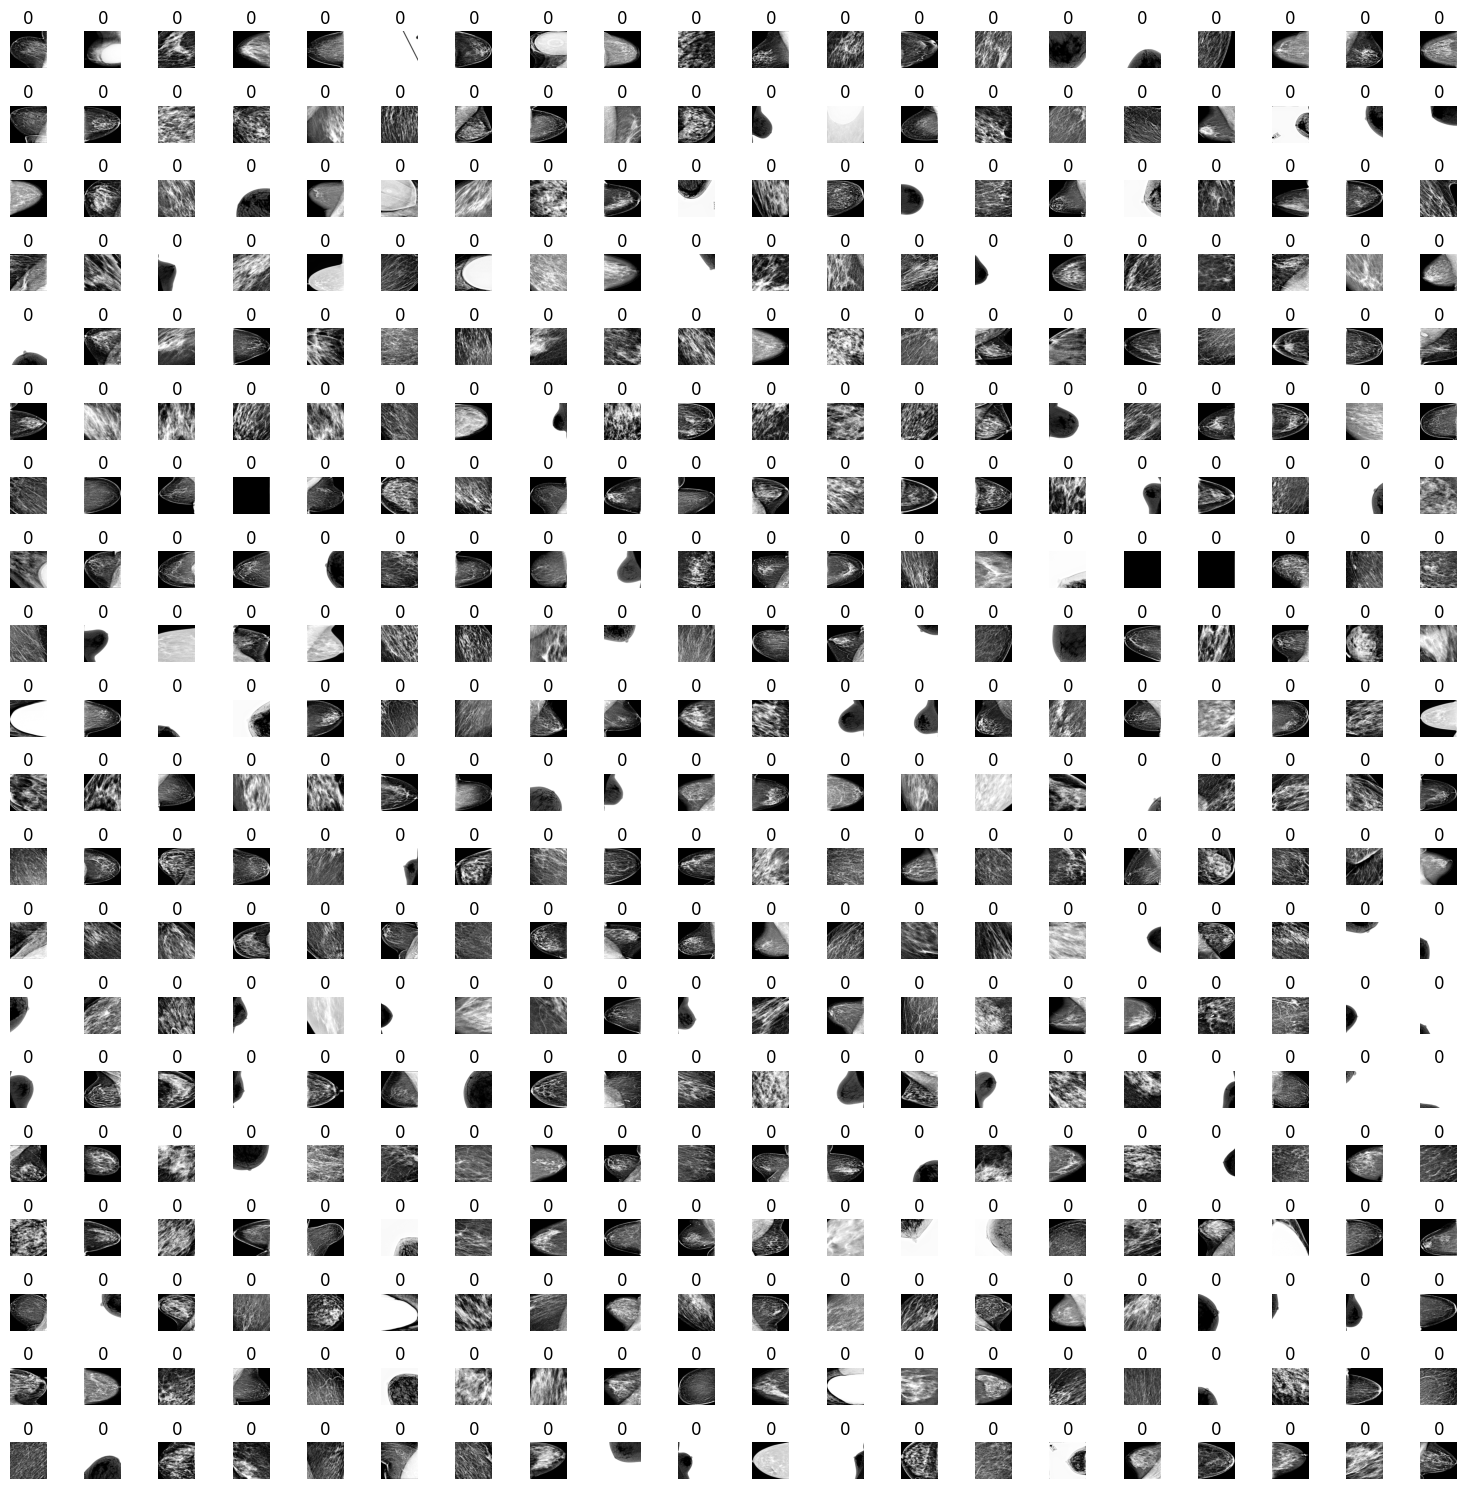

In [51]:
fig, axs = plt.subplots(20,20,figsize=(15,15))
ax = axs.flatten()
dataset = iter(train_dataset)
for idx in range(400):
    data = next(dataset)
    ax[idx].imshow(data["image"].numpy()[0], cmap="gray")
    ax[idx].axis("off")
    ax[idx].set_title(data["target"])
plt.tight_layout()

# ガン画像 

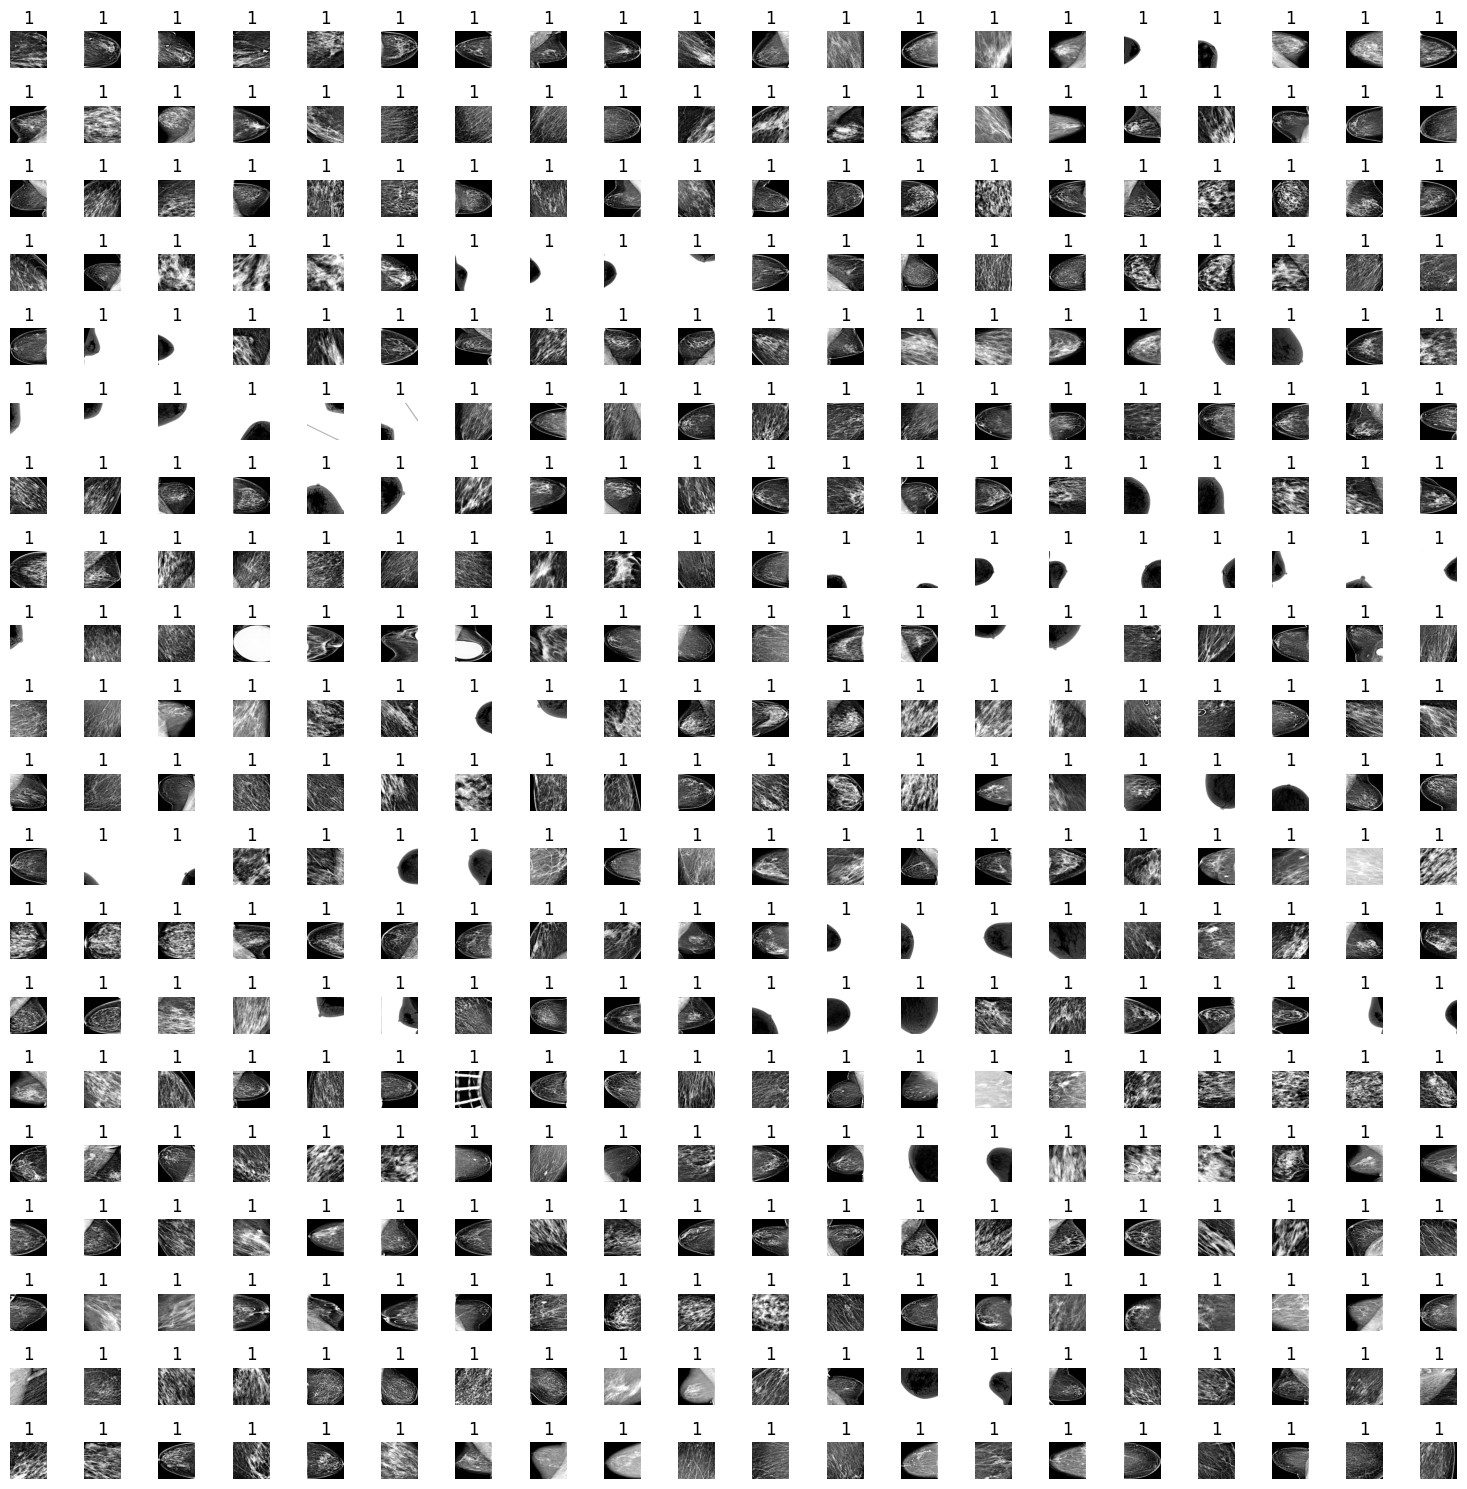

In [55]:
cfg = DictConfig({"aug": {"version":"v0.0.0", "horizontal_flip":0.5, "vertical_flip":0.5}})
transform = Transform(cfg)
train_dataset = RSNADatasetPNG(df_train[df_train["cancer"]==1].reset_index(drop=True), transform.get(is_train=True), ["laterality", "view", "age", "implant"], has_target=True)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=2, pin_memory=True)

fig, axs = plt.subplots(20,20,figsize=(15,15))
ax = axs.flatten()
dataset = iter(train_dataset)
for idx in range(400):
    data = next(dataset)
    ax[idx].imshow(data["image"].numpy()[0], cmap="gray")
    ax[idx].axis("off")
    ax[idx].set_title(data["target"])
plt.tight_layout()

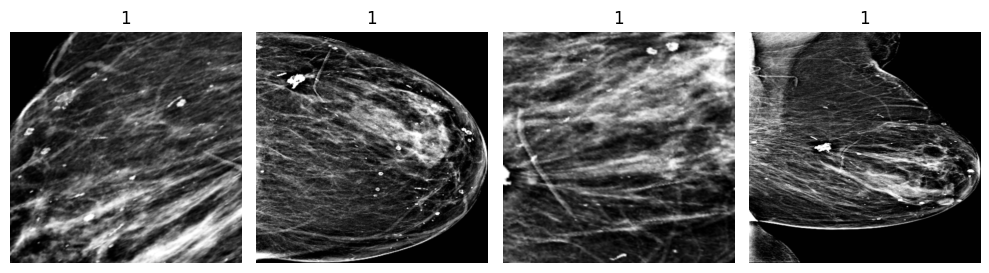

In [68]:
cfg = DictConfig({"aug": {"version":"v0.0.0", "horizontal_flip":0.5, "vertical_flip":0.5}})
transform = Transform(cfg)
train_dataset = RSNADatasetPNG(df_train[df_train["cancer"]==1].reset_index(drop=True), transform.get(is_train=True), ["laterality", "view", "age", "implant"], has_target=True)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=2, pin_memory=True)

fig, axs = plt.subplots(1,4,figsize=(10,5))
ax = axs.flatten()
dataset = iter(train_dataset)
for idx in range(4):
    data = next(dataset)
    ax[idx].imshow(data["image"].numpy()[0], cmap="gray")
    ax[idx].axis("off")
    ax[idx].set_title(data["target"])
plt.tight_layout()

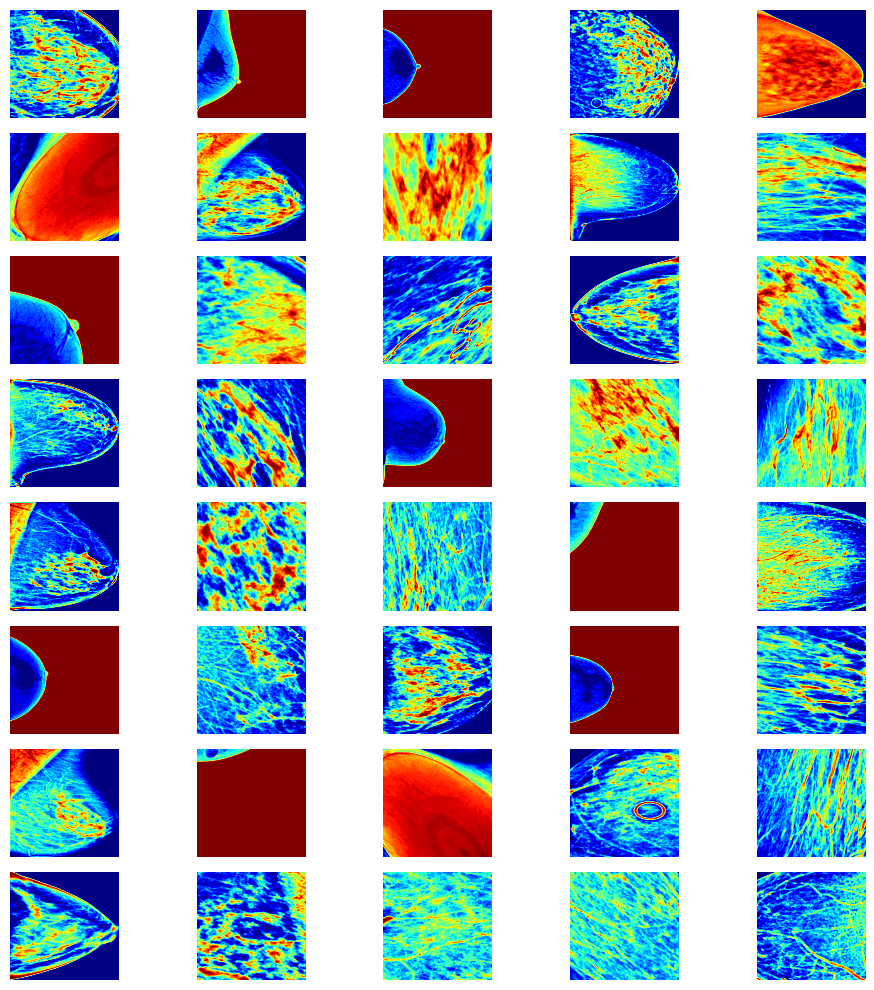

In [55]:
cfg = DictConfig({"aug": {"version":"v0.0.0", "horizontal_flip":0., "vertical_flip":0.}})
transform = Transform(cfg)
train_dataset = RSNADatasetPNG(df_train[df_train["cancer"]==0].reset_index(drop=True), transform.get(is_train=True), ["laterality", "view", "age", "implant"], has_target=True)

fig, axs = plt.subplots(8,5,figsize=(10,10))
ax = axs.flatten()
# dataset = iter(train_dataset)
for idx in range(40):
    jdx = np.random.randint(0,1000)
    data = train_dataset[jdx]
    ax[idx].imshow(data["image"].numpy()[0], cmap="jet")
    ax[idx].axis("off")
plt.tight_layout()

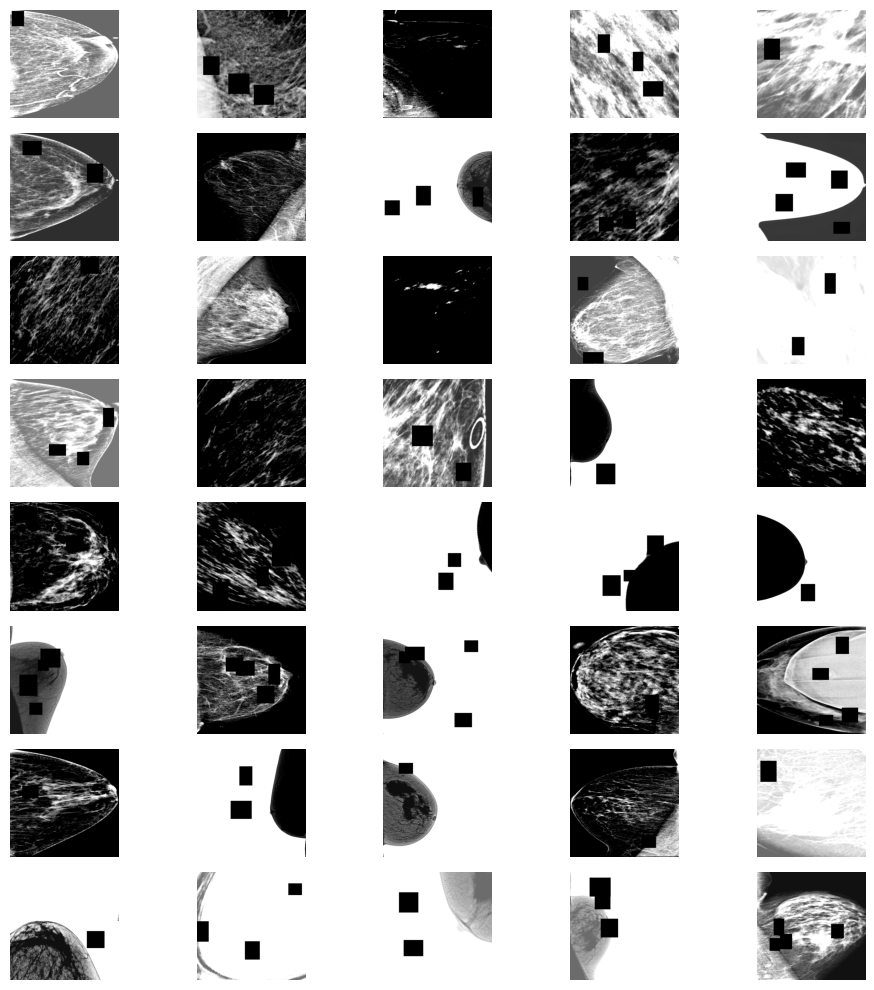

In [ ]:
cfg = DictConfig({"aug": {"version":"v0.0.2", "horizontal_flip":0.5, "vertical_flip":0.5}})
transform = Transform(cfg)
train_dataset = RSNADatasetPNG(df_train[df_train["cancer"]==0].reset_index(drop=True), transform.get(is_train=True), ["laterality", "view", "age", "implant"], has_target=True)

fig, axs = plt.subplots(8,5,figsize=(10,10))
ax = axs.flatten()
# dataset = iter(train_dataset)
for idx in range(40):
    jdx = np.random.randint(0,1000)
    data = train_dataset[jdx]
    ax[idx].imshow(data["image"].numpy()[0], cmap="gray")
    ax[idx].axis("off")
plt.tight_layout()

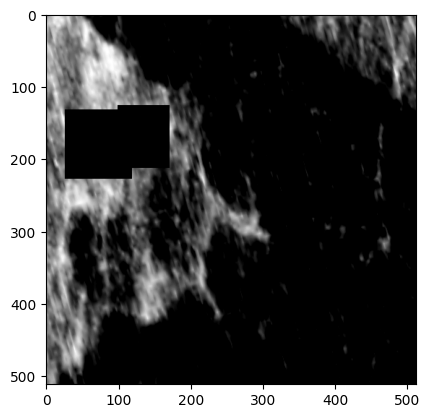

In [4]:
plt.imshow(data["image"].numpy()[0], cmap="gray")

In [134]:
img = data["image"].numpy()[0]
plt.imshow(np.bitwise_not(img), cmap="gray")

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

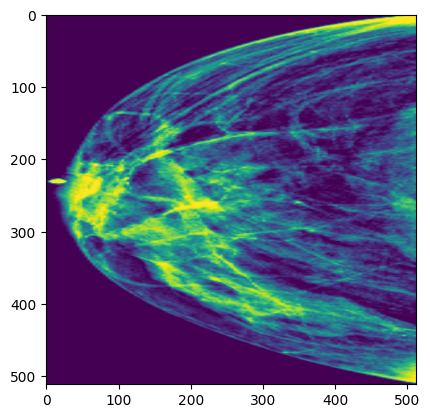

In [135]:
plt.imshow(img)

/Users/ktakeda/workspace/kaggle/rsna-breast-cancer-detection/data/dicom2png_512/26178/1617112699.png


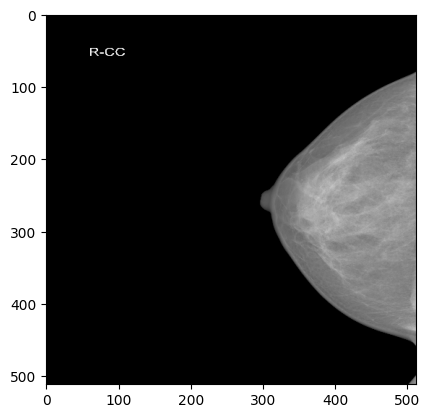

In [63]:
path = df_train["path"][3]
print(path)
img = cv2.imread(path)
plt.imshow(img)

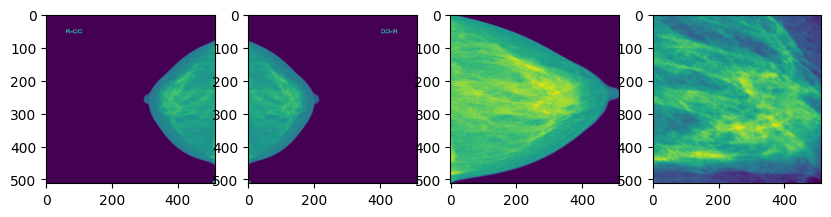

In [104]:
cfg = DictConfig({"aug": {"version":"v0.0.0", "horizontal_flip":0.5, "vertical_flip":0.5}})
transform = Transform(cfg).get(is_train=True)

index = 3

image_path = df_train["path"][index]
img_orig = prep.load_img(image_path)

# preprocess
# - laterality = R なら左右反転 (encodeされているので0/1)
if prep.is_flip_side(img_orig):
    image1 = np.fliplr(img_orig)
else :
    image1 = img_orig

# - 胸部のみ抽出
image2, _ = prep.get_breast_region_2(image1)

# Apply transforms
transf_image = transform(image=image2)['image']

fig, ax = plt.subplots(1,4,figsize=(10,5))
ax[0].imshow(img_orig)
ax[1].imshow(image1)
ax[2].imshow(image2)
ax[3].imshow(transf_image[0])


0 81 214 376


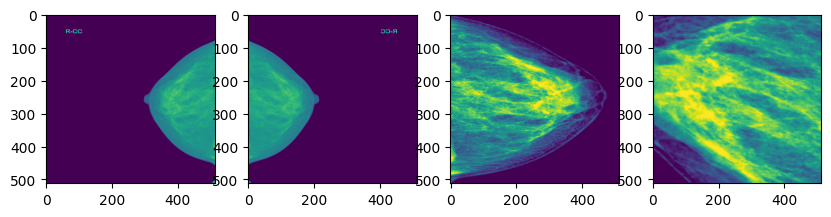

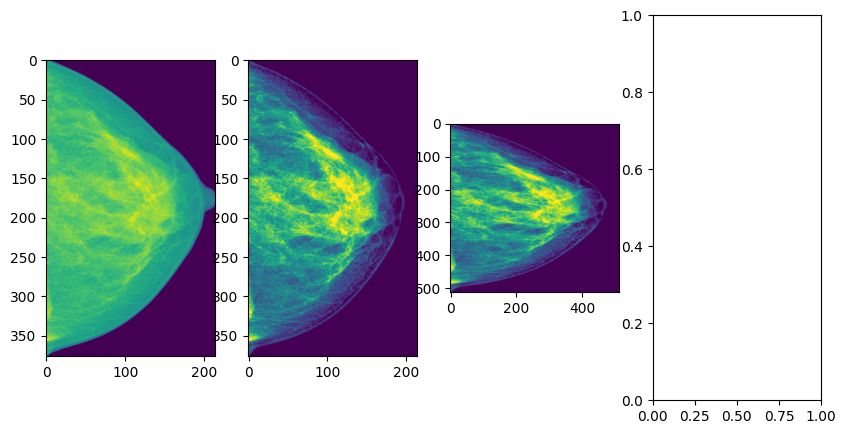

In [93]:
cfg = DictConfig({"aug": {"version":"v0.0.0", "horizontal_flip":0.5, "vertical_flip":0.5}})
transform = Transform(cfg).get(is_train=True)

index = 3

image_path = df_train["path"][index]
img_orig = prep.load_img(image_path)

# preprocess
# - laterality = R なら左右反転 (encodeされているので0/1)
if df_train.iloc[index]["laterality"] == 1 :
    image1 = np.fliplr(img_orig)
else :
    image1 = img_orig

# ----------------------------------------------------------------
# - 胸部のみ抽出
# image2, _ = prep.get_breast_region_2(image1)

orig_shape = image1.shape

(x, y, w, h) = prep.crop_coords(image1)
print(x, y, w, h)
img_cropped = image1[y:y+h, x:x+w]

img_normalized = prep.truncation_normalization(img_cropped)

# Enhancing the contrast of the image.
cl1 = prep.clahe(img_normalized, 1.0)
cl2 = prep.clahe(img_normalized, 2.0)
img_final = cv2.merge((np.array(img_normalized*255, dtype=np.uint8),cl1,cl2))
img_final = cv2.cvtColor(img_final, cv2.COLOR_BGR2GRAY)

# Resize the image to the final shape. 
img_final = cv2.resize(img_final, orig_shape)

# ----------------------------------------------------------------

# Apply transforms
transf_image = transform(image=image2)['image']

fig, ax = plt.subplots(1,4,figsize=(10,5))
ax[0].imshow(img_orig)
ax[1].imshow(image1)
ax[2].imshow(image2)
ax[3].imshow(transf_image[0])

fig, ax = plt.subplots(1,4,figsize=(10,5))
ax[0].imshow(img_cropped)
ax[1].imshow(img_normalized)
ax[2].imshow(img_final)


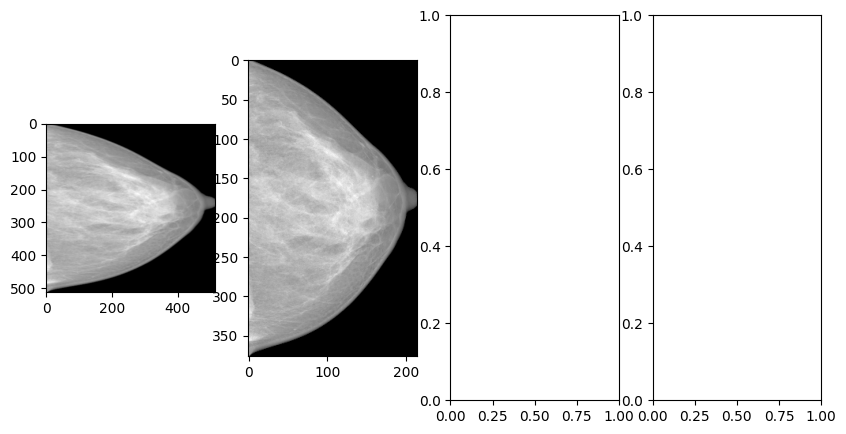

In [108]:
cfg = DictConfig({"aug": {"version":"v0.0.0", "horizontal_flip":0.5, "vertical_flip":0.5}})
transform = Transform(cfg).get(is_train=True)

index = 3

image_path = df_train["path"][index]
img_orig = prep.load_img(image_path)

bp = prep.BreastPreprocessor()
image2, aux = bp.get_breast_region_2(img_orig)
# Apply transforms
transf_image = transform(image=image2)['image']

fig, ax = plt.subplots(1,4,figsize=(10,5))
ax[0].imshow(image2, cmap="gray")
ax[1].imshow(aux[0], cmap="gray")


(array([92976.,   720.,   823.,  1485.,  2992., 30481., 49464., 57378.,
        24087.,  1738.]),
 array([  0. ,  19.8,  39.6,  59.4,  79.2,  99. , 118.8, 138.6, 158.4,
        178.2, 198. ]),
 <BarContainer object of 10 artists>)

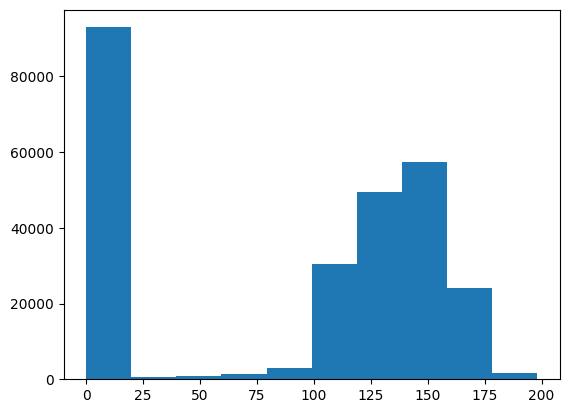

In [110]:
plt.hist(image2.flatten())

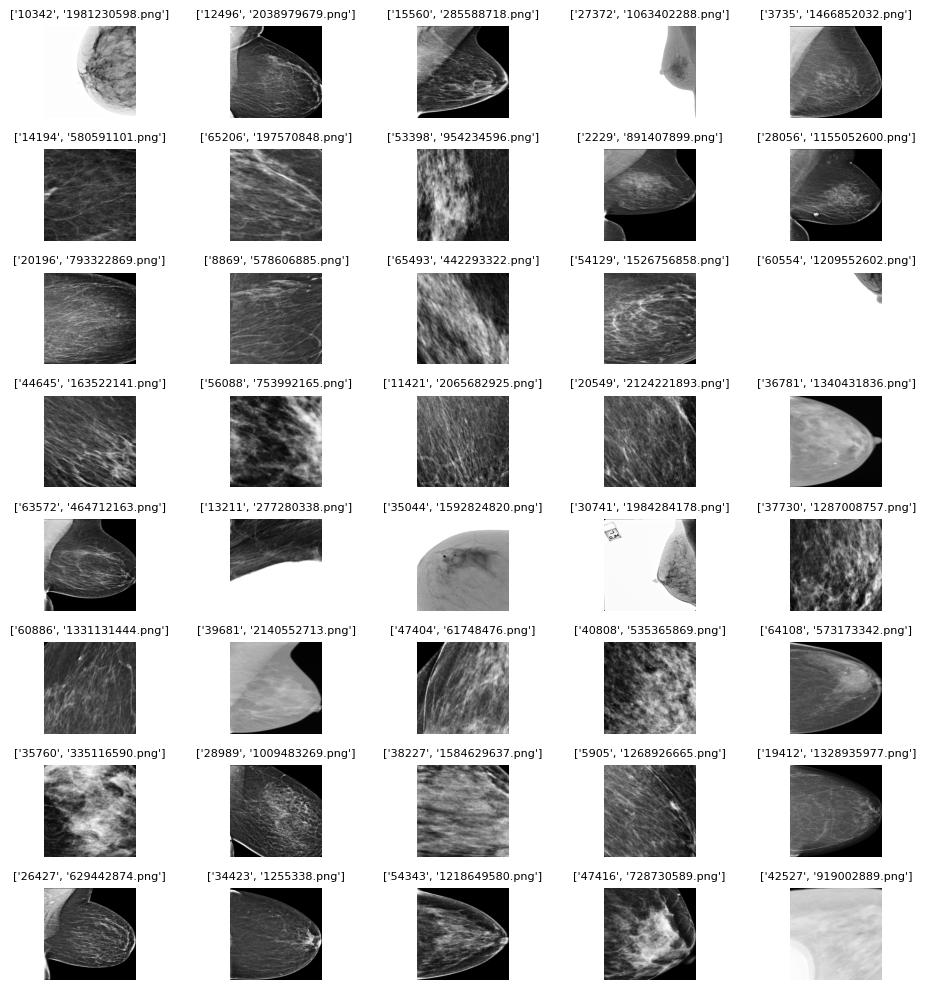

In [133]:
cfg = DictConfig({"aug": {"version":"v0.0.0", "horizontal_flip":0., "vertical_flip":0.}})
transform = Transform(cfg)
train_dataset = RSNADatasetPNG(df_train[df_train["cancer"]==0].reset_index(drop=True), transform.get(is_train=True), ["laterality", "view", "age", "implant"], has_target=True, image_prep_ver="v2")

np.random.seed(1993)

fig, axs = plt.subplots(8,5,figsize=(10,10))
ax = axs.flatten()
# dataset = iter(train_dataset)
for idx in range(40):
    jdx = np.random.randint(0,1000)
    data = train_dataset[jdx]
    ax[idx].imshow(data["image"].numpy()[0], cmap="gray")
    ax[idx].axis("off")
    ax[idx].set_title(train_dataset.dataframe["path"][jdx].split("/")[-2:], fontsize=8)
plt.tight_layout()

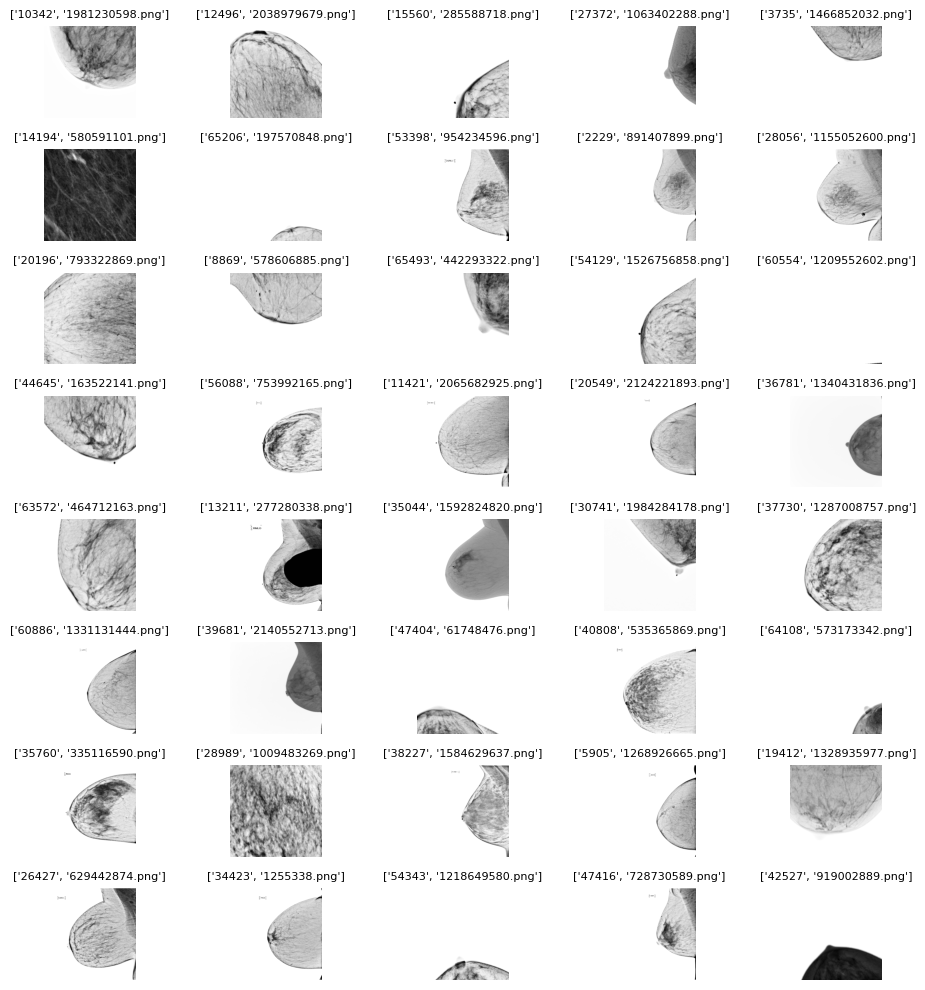

In [139]:
cfg = DictConfig({"aug": {"version":"v0.0.0", "horizontal_flip":0., "vertical_flip":0.}})
transform = Transform(cfg)
train_dataset = RSNADatasetPNG(df_train[df_train["cancer"]==0].reset_index(drop=True), transform.get(is_train=True), ["laterality", "view", "age", "implant"], has_target=True, image_prep_ver="v3")

np.random.seed(1993)

fig, axs = plt.subplots(8,5,figsize=(10,10))
ax = axs.flatten()
# dataset = iter(train_dataset)
for idx in range(40):
    jdx = np.random.randint(0,1000)
    data = train_dataset[jdx]
    ax[idx].imshow(data["image"].numpy()[0], cmap="gray")
    ax[idx].axis("off")
    ax[idx].set_title(train_dataset.dataframe["path"][jdx].split("/")[-2:], fontsize=8)
plt.tight_layout()

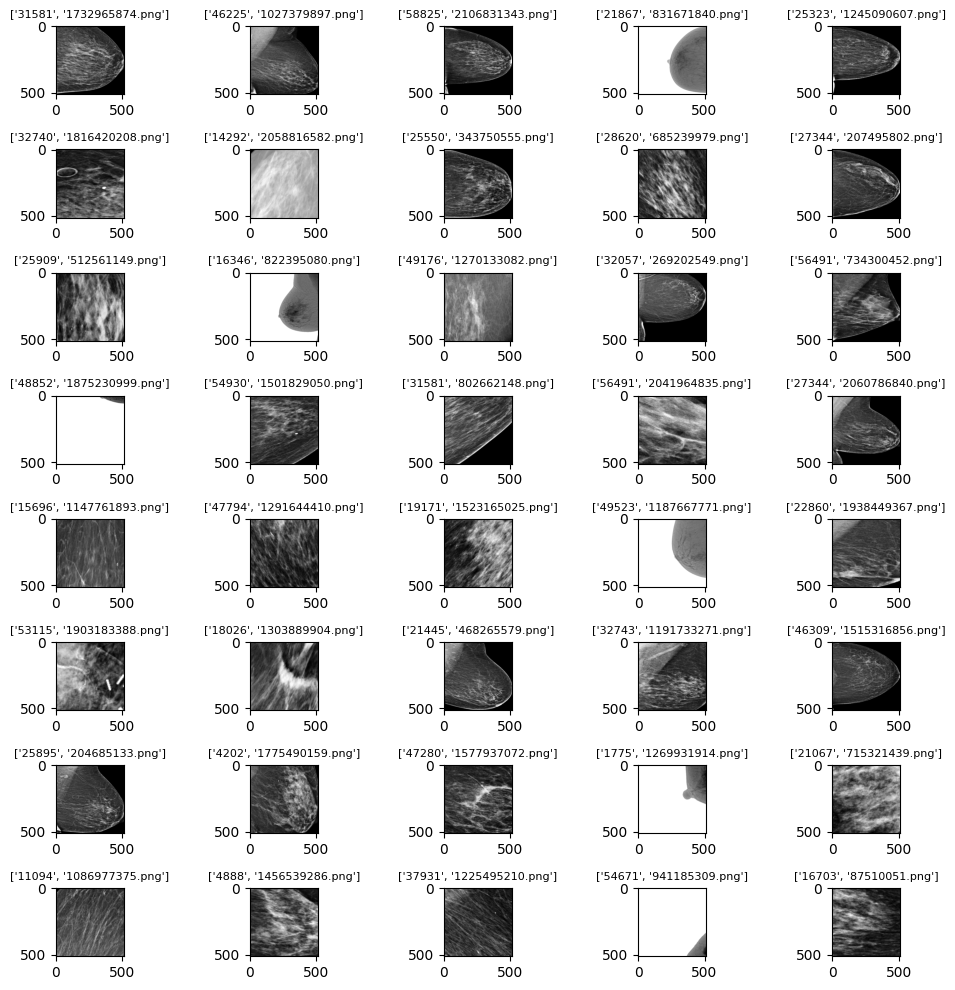

In [161]:
cfg = DictConfig({"aug": {"version":"v0.0.0", "horizontal_flip":0., "vertical_flip":0.}})
transform = Transform(cfg)
train_dataset = RSNADatasetPNG(df_train[df_train["cancer"]==1].reset_index(drop=True), transform.get(is_train=True), ["laterality", "view", "age", "implant"], has_target=True, image_prep_ver="v3")

np.random.seed(1993)

fig, axs = plt.subplots(8,5,figsize=(10,10))
ax = axs.flatten()
# dataset = iter(train_dataset)
for idx in range(40):
    jdx = np.random.randint(0,1000)
    data = train_dataset[jdx]
    ax[idx].imshow(data["image"].numpy()[0], cmap="gray")
    # ax[idx].axis("off")
    ax[idx].set_title(train_dataset.dataframe["path"][jdx].split("/")[-2:], fontsize=8)
plt.tight_layout()

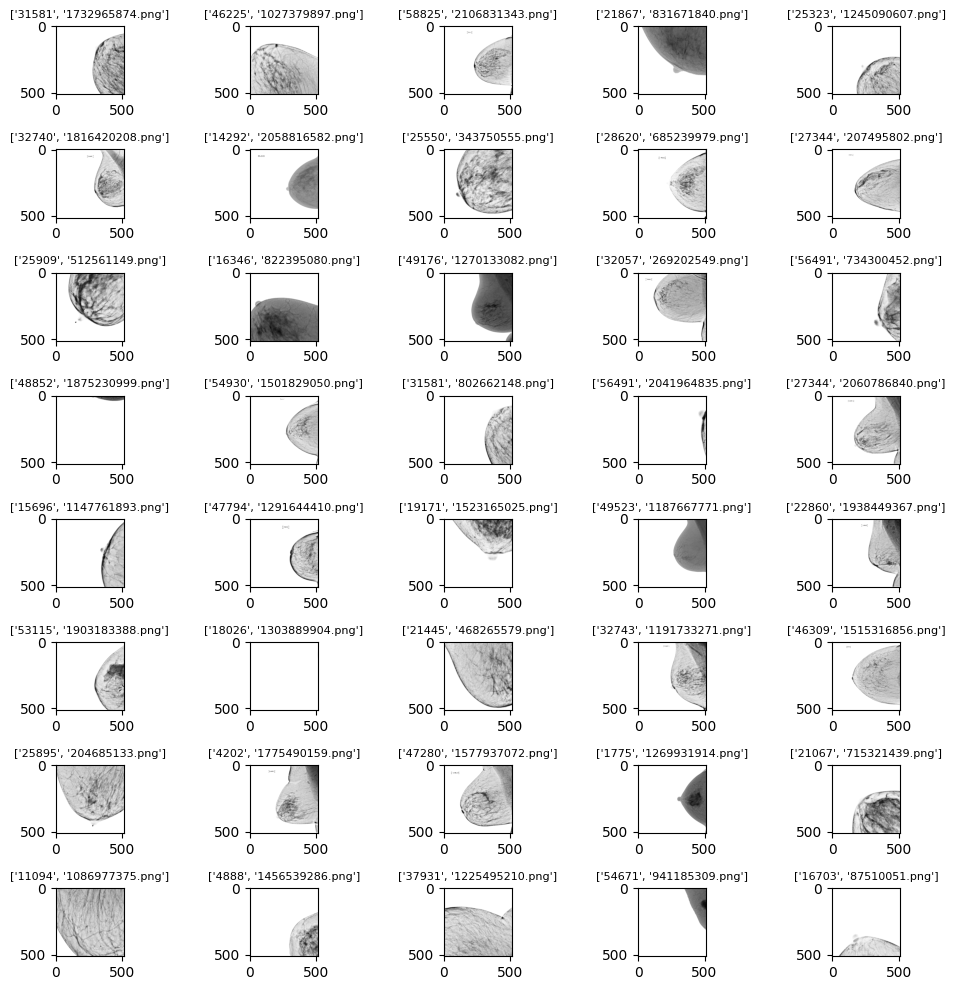

In [162]:
cfg = DictConfig({"aug": {"version":"v0.0.0", "horizontal_flip":0., "vertical_flip":0.}})
transform = Transform(cfg)
train_dataset = RSNADatasetPNG(df_train[df_train["cancer"]==1].reset_index(drop=True), transform.get(is_train=True), ["laterality", "view", "age", "implant"], has_target=True, image_prep_ver="v3")

np.random.seed(1993)

fig, axs = plt.subplots(8,5,figsize=(10,10))
ax = axs.flatten()
# dataset = iter(train_dataset)
for idx in range(40):
    jdx = np.random.randint(0,1000)
    data = train_dataset[jdx]
    ax[idx].imshow(data["image"].numpy()[0], cmap="gray")
    # ax[idx].axis("off")
    ax[idx].set_title(train_dataset.dataframe["path"][jdx].split("/")[-2:], fontsize=8)
plt.tight_layout()

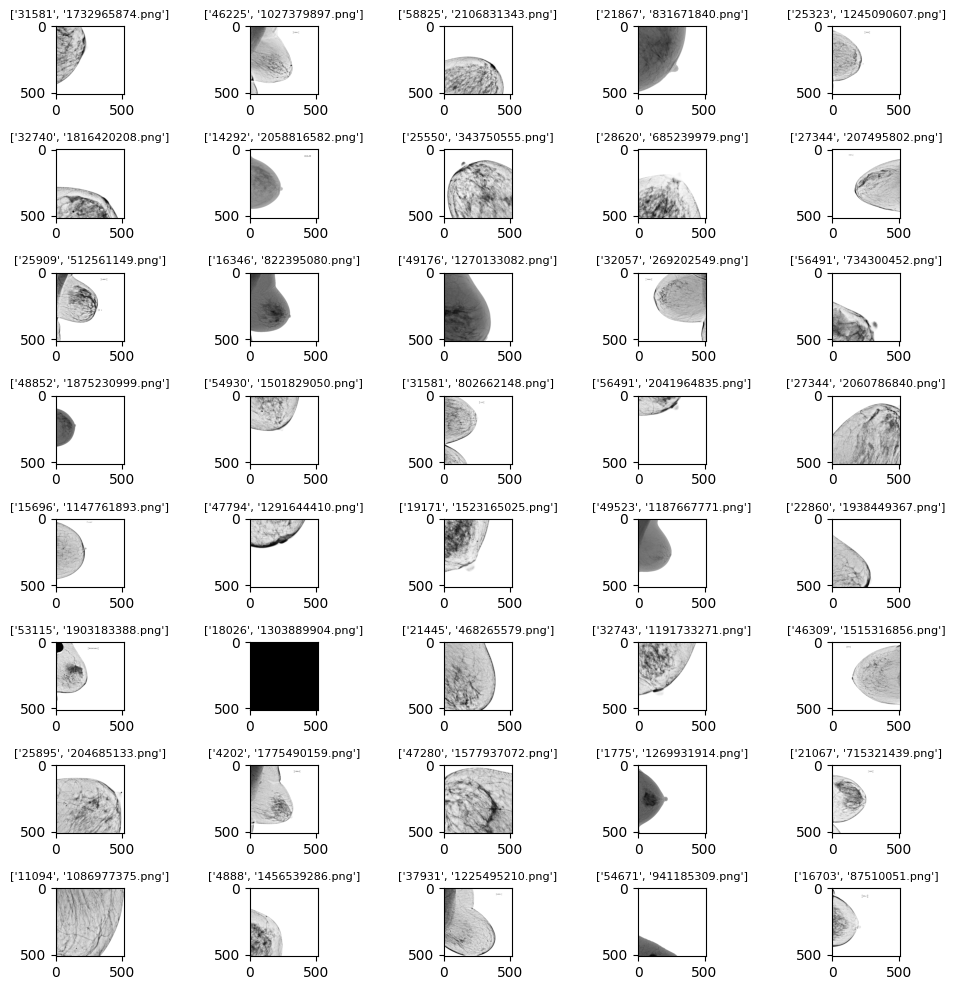

In [182]:
cfg = DictConfig({"aug": {"version":"v0.0.0", "horizontal_flip":0., "vertical_flip":0.}})
transform = Transform(cfg)
train_dataset = RSNADatasetPNG(df_train[df_train["cancer"]==1].reset_index(drop=True), transform.get(is_train=True), ["laterality", "view", "age", "implant"], has_target=True, image_prep_ver="v3")

np.random.seed(1993)

fig, axs = plt.subplots(8,5,figsize=(10,10))
ax = axs.flatten()
# dataset = iter(train_dataset)
for idx in range(40):
    jdx = np.random.randint(0,1000)
    data = train_dataset[jdx]
    ax[idx].imshow(data["image"].numpy()[0], cmap="gray")
    # ax[idx].axis("off")
    ax[idx].set_title(train_dataset.dataframe["path"][jdx].split("/")[-2:], fontsize=8)
plt.tight_layout()

True


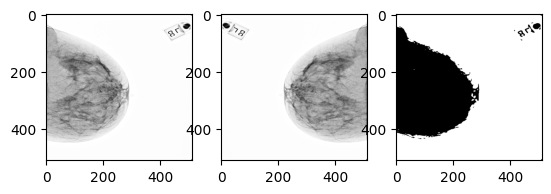

In [141]:
path = "/Users/ktakeda/workspace/kaggle/rsna-breast-cancer-detection/data/dicom2png_512/10342/1981230598.png"
img = prep.load_img(path)
bp = prep.BreastPreprocessor(version="v3")
# img = cv2.bitwise_not(img)
image, aux = bp.get_breast_region(img)
        
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret, breast_mask = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

print(bp.is_flip_side(img))

fig, ax = plt.subplots(1,3)
ax[0].imshow(img, cmap="gray")
ax[1].imshow(image, cmap="gray")
ax[2].imshow(breast_mask, cmap="gray")

True


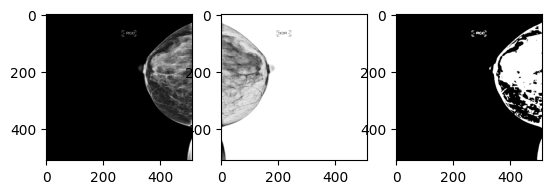

In [183]:
path = "/Users/ktakeda/workspace/kaggle/rsna-breast-cancer-detection/data/dicom2png_512/56491/2041964835.png"
img = prep.load_img(path)
bp = prep.BreastPreprocessor(version="v3")
# img = cv2.bitwise_not(img)
image, aux = bp.get_breast_region(img)
        
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret, breast_mask = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

print(bp.is_flip_side(img))

fig, ax = plt.subplots(1,3)
ax[0].imshow(img, cmap="gray")
ax[1].imshow(image, cmap="gray")
ax[2].imshow(breast_mask, cmap="gray")

False


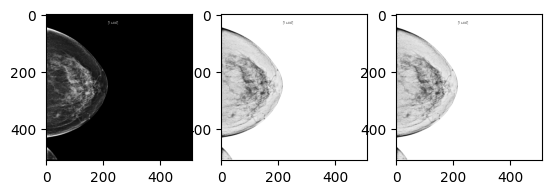

In [186]:
path = "/Users/ktakeda/workspace/kaggle/rsna-breast-cancer-detection/data/dicom2png_512/4888/1456539286.png"
img = prep.load_img(path)
bp = prep.BreastPreprocessor(version="v3")
# img = cv2.bitwise_not(img)
image, aux = bp.get_breast_region(img)

print(bp.is_flip_side(img))

fig, ax = plt.subplots(1,3)
ax[0].imshow(img, cmap="gray")
ax[1].imshow(image, cmap="gray")
ax[2].imshow(aux[0], cmap="gray")

1764.8211754824865
0.0


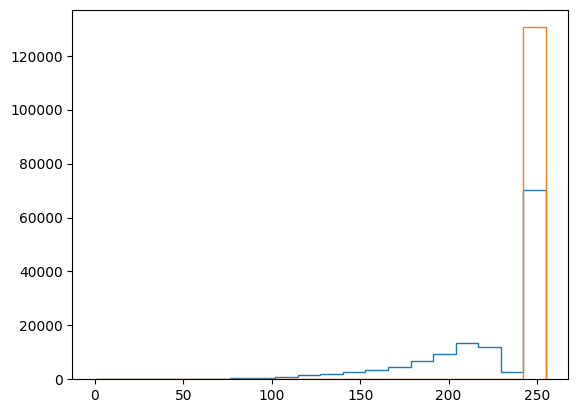

In [181]:
fig, ax = plt.subplots()
ax.hist(image[:, 255:].flatten(), histtype="step", bins=20, range=(0,255))
ax.hist(image[:, :255].flatten(), histtype="step", bins=20, range=(0,255))

print(np.var(image[:, 255:].flatten()))
print(np.var(image[:, :255].flatten()))
plt.show()

(360, 69, 152, 271)


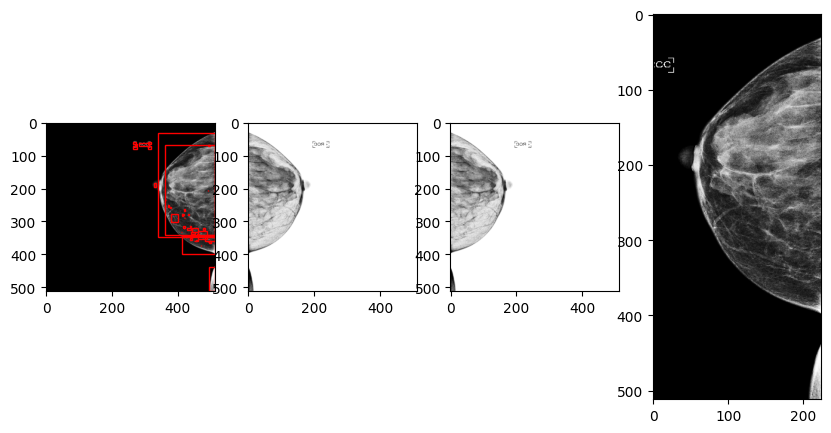

In [201]:
# path = "/Users/ktakeda/workspace/kaggle/rsna-breast-cancer-detection/data/dicom2png_512/10342/1981230598.png"
path = "/Users/ktakeda/workspace/kaggle/rsna-breast-cancer-detection/data/dicom2png_512/56491/2041964835.png"
img = prep.load_img(path)

bp = prep.BreastPreprocessor(version="v3")
image, aux = bp.get_breast_region(img)

blur = cv2.GaussianBlur(img, (5, 5), 0)
ret, breast_mask = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cnts, _ = cv2.findContours(breast_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = max(cnts, key = cv2.contourArea)
print(cv2.boundingRect(cnt))

fig, ax = plt.subplots(1,4, figsize=(10,5))
ax[0].imshow(img, cmap="gray")
ax[1].imshow(image, cmap="gray")
ax[2].imshow(aux[0], cmap="gray")
ax[3].imshow(img[:, int(360*0.8):int(360*0.8)+int(152*1.5)], cmap="gray")

for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax[0].add_patch(rect)

(0, 69, 152, 271)


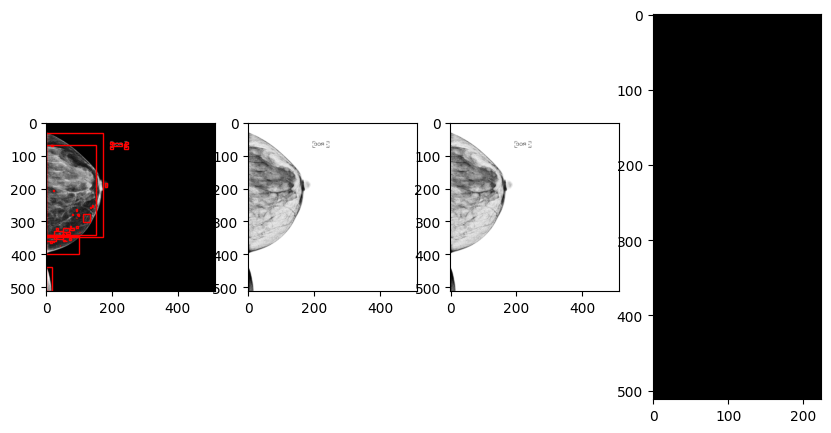

In [204]:
# path = "/Users/ktakeda/workspace/kaggle/rsna-breast-cancer-detection/data/dicom2png_512/10342/1981230598.png"
path = "/Users/ktakeda/workspace/kaggle/rsna-breast-cancer-detection/data/dicom2png_512/56491/2041964835.png"
img = prep.load_img(path)

bp = prep.BreastPreprocessor(version="v3")
image, aux = bp.get_breast_region(img)

# if np.mean(img.flatten()) < 100:
#     img = cv2.bitwise_not(img)
# if bp.is_flip_side(img, mode="var"):
#     img = np.fliplr(img)

img = np.fliplr(img)

blur = cv2.GaussianBlur(img, (5, 5), 0)
ret, breast_mask = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cnts, _ = cv2.findContours(breast_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = max(cnts, key = cv2.contourArea)
print(cv2.boundingRect(cnt))

fig, ax = plt.subplots(1,4, figsize=(10,5))
ax[0].imshow(img, cmap="gray")
ax[1].imshow(image, cmap="gray")
ax[2].imshow(aux[0], cmap="gray")
ax[3].imshow(img[:, int(360*0.8):int(360*0.8)+int(152*1.5)], cmap="gray")

for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax[0].add_patch(rect)

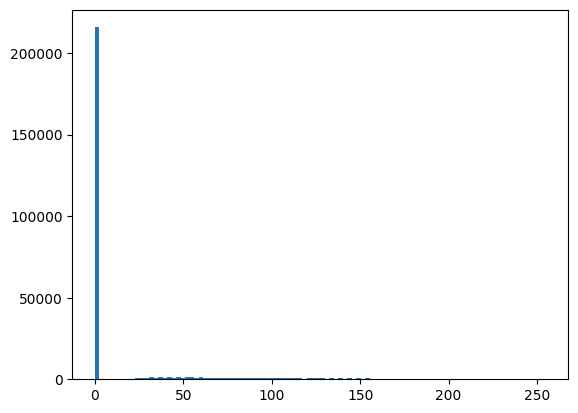

In [208]:
img = prep.load_img(path)

plt.hist(img.flatten(), bins=100)
plt.show()

(360, 69, 152, 271)


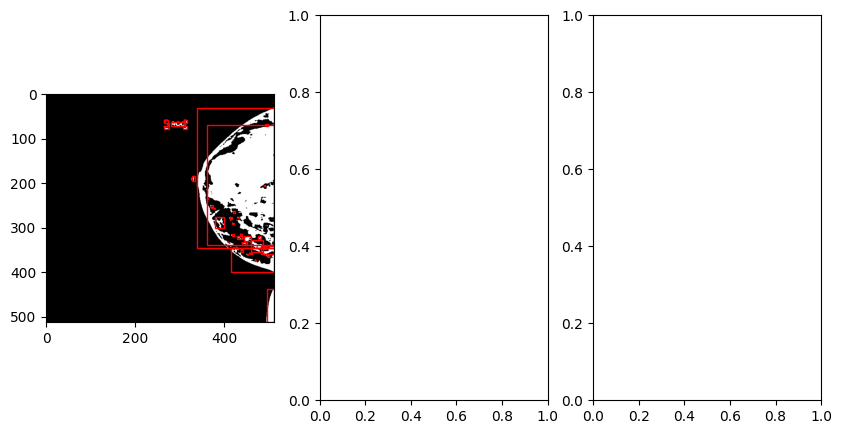

In [185]:
# path = "/Users/ktakeda/workspace/kaggle/rsna-breast-cancer-detection/data/dicom2png_512/10342/1981230598.png"
path = "/Users/ktakeda/workspace/kaggle/rsna-breast-cancer-detection/data/dicom2png_512/56491/2041964835.png"
img = prep.load_img(path)

bp = prep.BreastPreprocessor(version="v3")

print(bp.crop_coords(img))
        
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret, breast_mask = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cnts, _ = cv2.findContours(breast_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = max(cnts, key =cv2.contourArea)
fig, ax = plt.subplots(1,3, figsize=(10,5))
# ax[0].imshow(img, cmap="gray")
# ax[1].imshow(image, cmap="gray")
ax[0].imshow(breast_mask, cmap="gray")

for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax[0].add_patch(rect)

In [114]:
index = 3
image_path = df_train["path"][index]
img_orig = prep.load_img(image_path)
col_sums_split = np.array_split(np.sum(img_orig, axis=0), 2)
left_col_sum = np.sum(col_sums_split[0])
right_col_sum = np.sum(col_sums_split[1])

print(left_col_sum, right_col_sum)

41048 7086316


In [100]:
col_sums_split[0].shape, col_sums_split[1].shape

((256,), (256,))

/Users/ktakeda/workspace/kaggle/rsna-breast-cancer-detection/data/dicom2png_512/26178/1617112699.png


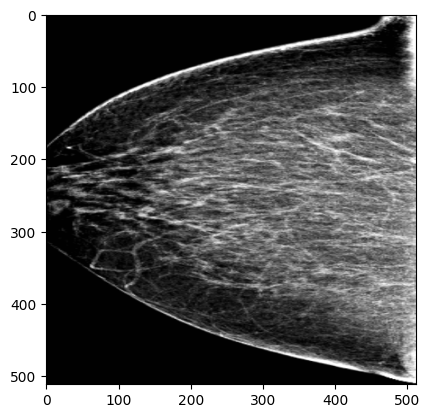

In [68]:
cfg = DictConfig({"aug": {"version":"v0.0.0", "horizontal_flip":0.5, "vertical_flip":0.5}})
transform = Transform(cfg)
train_dataset = RSNADatasetPNG(df_train.reset_index(drop=True), transform.get(is_train=True), ["laterality", "view", "age", "implant"], has_target=True)


data = train_dataset[4]
print(train_dataset.dataframe["path"][3])
plt.imshow(data["image"].numpy()[0], cmap="gray")

In [70]:
train_dataset.dataframe.head()

patient_id    image_id   age  implant  \
0      15696  1216427802  65.0        0   
1       9228   334114182  51.0        0   
2      50234  1509636612  52.0        0   
3      26178  1617112699  40.0        0   
4      15350  1399405629  65.0        0   

                                                path  cancer  laterality  view  
0  /Users/ktakeda/workspace/kaggle/rsna-breast-ca...       0           1     3  
1  /Users/ktakeda/workspace/kaggle/rsna-breast-ca...       0           1     3  
2  /Users/ktakeda/workspace/kaggle/rsna-breast-ca...       0           1     1  
3  /Users/ktakeda/workspace/kaggle/rsna-breast-ca...       0           1     1  
4  /Users/ktakeda/workspace/kaggle/rsna-breast-ca...       0           1     1